RandomForest

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:   10.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   34.2s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.0s finished


RandomForest (50k sample) RMSE: 7226.41
Training Time: 34.4 seconds


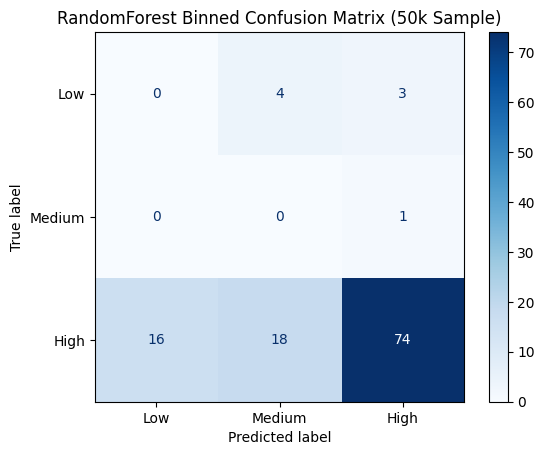

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import root_mean_squared_error, confusion_matrix, ConfusionMatrixDisplay
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

# Load data
stations = pd.read_csv(r"C:\Users\Quang Nguyen\OneDrive\Documents\ENGG2112\trafficStations (1).csv")
traffic = pd.read_csv(r"C:\Users\Quang Nguyen\OneDrive\Documents\ENGG2112\trafficData.csv")

# Merge datasets
data = traffic.merge(stations, on="station_key", how="left")

# Feature columns
features = [
    'year', 'month', 'day', 'day_of_week',
    'public_holiday', 'school_holiday',
    'permanent_station', 'vehicle_classifier',
    'rms_region', 'suburb', 'road_on_type', 'road_functional_hierarchy'
]

data = data.dropna(subset=features + ['daily_total'])

# Define X (features) and y (target)
X = data[features]
y = data['daily_total']

# Subsample 50k random rows
sample_data = data.sample(n=100000, random_state=42)
X_sample = sample_data[features]
y_sample = sample_data['daily_total']

# Column types for preprocessing
numeric_features = ['year', 'month', 'day', 'day_of_week', 'permanent_station', 'vehicle_classifier']
categorical_features = ['public_holiday', 'school_holiday', 'rms_region', 'suburb', 'road_on_type', 'road_functional_hierarchy']


# Preprocessing
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numeric_features),
    ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features)
])

X_sample_processed = preprocessor.fit_transform(X_sample)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_sample_processed, y_sample, test_size=0.2, random_state=42)

# Train RandomForest
rf_model = RandomForestRegressor(n_estimators=100, max_depth=20, n_jobs=-1, random_state=42, verbose=1)

start_time = time.time()
rf_model.fit(X_train, y_train)
end_time = time.time()

# Predict
y_pred = rf_model.predict(X_test)

# RMSE
rmse = root_mean_squared_error(y_test, y_pred)
print(f"RandomForest subsample RMSE: {rmse:.2f}")
print(f"Training Time: {end_time - start_time:.1f} seconds")

# Ensure numeric types
y_test = pd.to_numeric(y_test, errors='coerce')
y_pred = pd.to_numeric(y_pred, errors='coerce')

# Clean NaNs
mask = (~y_test.isna()) & (~pd.Series(y_pred).isna())
y_test_clean = y_test[mask]
y_pred_clean = pd.Series(y_pred)[mask]

# Define bins
bins = [0, 1000, 5000, np.inf]
labels = ['Low', 'Medium', 'High']

# Apply binning
y_test_binned = pd.cut(y_test_clean, bins=bins, labels=labels)
y_pred_binned = pd.cut(y_pred_clean, bins=bins, labels=labels)

# Compute confusion matrix
cm = confusion_matrix(y_test_binned, y_pred_binned, labels=labels)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap='Blues')
plt.title("RandomForest Binned Confusion Matrix For Subsample")
plt.show()


MLP

Training MLP on subsampled data...
Iteration 1, loss = 123802378.02479622
Validation score: 0.241235
Iteration 2, loss = 48838205.66116253
Validation score: 0.488211
Iteration 3, loss = 35367513.30108122
Validation score: 0.596112
Iteration 4, loss = 29899615.39904306
Validation score: 0.632076
Iteration 5, loss = 28102261.88284475
Validation score: 0.646096
Iteration 6, loss = 27291643.30909134
Validation score: 0.653522
Iteration 7, loss = 26765762.34724974
Validation score: 0.659560
Iteration 8, loss = 26320104.92549289
Validation score: 0.664981
Iteration 9, loss = 25875992.71351274
Validation score: 0.670510
Iteration 10, loss = 25457512.38605305
Validation score: 0.675273
Iteration 11, loss = 25020004.36005965
Validation score: 0.679951
Iteration 12, loss = 24619990.08134966
Validation score: 0.684724
Iteration 13, loss = 24223709.77605089
Validation score: 0.688468
Iteration 14, loss = 23900091.26635281
Validation score: 0.692317
Iteration 15, loss = 23603722.32751694
Validation

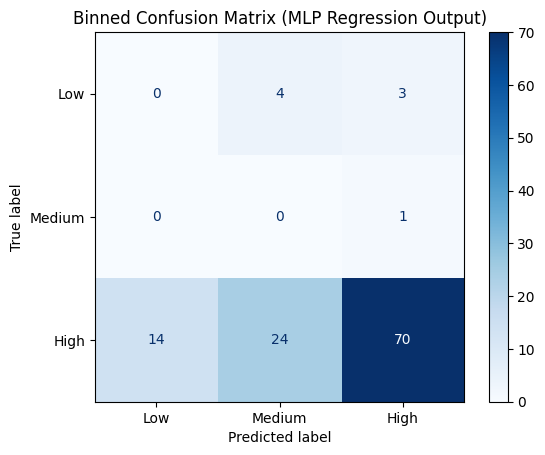

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import root_mean_squared_error
import time
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Load data
stations = pd.read_csv(r"C:\Users\Quang Nguyen\OneDrive\Documents\ENGG2112\trafficStations (1).csv")
traffic = pd.read_csv(r"C:\Users\Quang Nguyen\OneDrive\Documents\ENGG2112\trafficData.csv")

# Merge datasets
data = traffic.merge(stations, on="station_key", how="left")

# Feature columns
features = [
    'year', 'month', 'day', 'day_of_week',
    'public_holiday', 'school_holiday',
    'permanent_station', 'vehicle_classifier',
    'rms_region', 'suburb', 'road_on_type', 'road_functional_hierarchy'
]

data = data.dropna(subset=features + ['daily_total'])

# Define X (features) and y (target)
X = data[features]
y = data['daily_total']

# Subsample for MLP (300k rows)
sample_size = 100000
sample_data = data.sample(n=sample_size, random_state=42)
X_sample = sample_data[features]
y_sample = sample_data['daily_total']

# Column types for preprocessing
numeric_features = ['year', 'month', 'day', 'day_of_week', 'permanent_station', 'vehicle_classifier']
categorical_features = ['public_holiday', 'school_holiday', 'rms_region', 'suburb', 'road_on_type', 'road_functional_hierarchy']

# Preprocessing Pipeline
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numeric_features),
    ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features)
])

X_sample_processed = preprocessor.fit_transform(X_sample)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_sample_processed, y_sample, test_size=0.2, random_state=42)

# ---------------- Train MLP ----------------
print("Training MLP on subsampled data...")

# Optimized MLP Parameters
mlp_optimized = MLPRegressor(
    hidden_layer_sizes=(256, 128, 64),
    activation='relu',
    solver='adam',
    batch_size=512,
    learning_rate_init=0.001,
    max_iter=500,
    early_stopping=True,
    validation_fraction=0.1,
    tol=1e-4,
    random_state=42,
    verbose=True
)

# Timing & Fit
start_time = time.time()
mlp_optimized.fit(X_train, y_train)
end_time = time.time()

# Prediction & Evaluation
y_pred = mlp_optimized.predict(X_test)
rmse = root_mean_squared_error(y_test, y_pred)
print(f"\nMLP Subset Test RMSE: {rmse:.2f}")

total_time = time.time() - start_time
print(f"Training + Prediction Time: {total_time:.1f} seconds")

y_test = pd.to_numeric(y_test, errors='coerce')
y_pred = pd.to_numeric(y_pred, errors='coerce')

mask = (~y_test.isna()) & (~pd.Series(y_pred).isna())
y_test_clean = y_test[mask]
y_pred_clean = pd.Series(y_pred)[mask]

# Define bins again
bins = [0, 1000, 5000, np.inf]
labels = ['Low', 'Medium', 'High']

# Apply binning on cleaned data
y_test_binned = pd.cut(y_test_clean, bins=bins, labels=labels)
y_pred_binned = pd.cut(y_pred_clean, bins=bins, labels=labels)

# Compute Confusion Matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test_binned, y_pred_binned, labels=labels)

# Plot
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap='Blues')
plt.title("Binned Confusion Matrix (MLP Regression Output)")
plt.show()

